In [2]:
import sys
sys.path.append('../')

from prepare_data import PrepareData
from image_data_generator import DataGenerator
import keras
import numpy as np

x_test, y_test = PrepareData.load_set('test', '../data/processed/')

In [3]:
x_test = x_test / 255

In [4]:
print(x_test.shape)
print(y_test.shape)

(2000, 178, 178, 3)
(2000,)


## model1 

In [4]:
model = keras.models.load_model('../saved_models/binary_model1')

In [5]:
_, acc = model.evaluate(x_test, y_test, verbose=True)

63/63 [==============================] - 37s 569ms/step - loss: 0.4134 - accuracy: 0.8055


In [6]:
y_pred = model.predict(np.array( [x_test[0],] ))

1/1 [==============================] - 1s 1s/step


In [12]:
y_pred_treshold = np.where(y_pred > 0.5, 1, 0)
y_pred_treshold = y_pred_treshold.reshape(-1, )

In [13]:
y_pred_treshold

array([1, 0, 1, ..., 1, 0, 1])

In [14]:
y_test

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_treshold))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       996
           1       0.79      0.83      0.81      1004

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



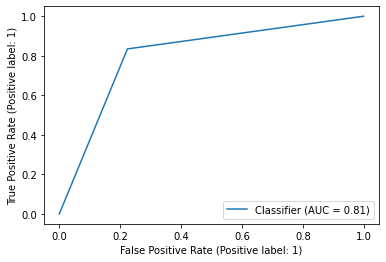

In [17]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred_treshold)

## model 2

In [3]:
model2 = keras.models.load_model('../saved_models/binary_model2')


In [4]:
# model2.save('../models/binary_model2.h5')

In [23]:
_, acc2 = model2.evaluate(x_test, y_test, verbose=True)

63/63 [==============================] - 68s 1s/step - loss: 0.4256 - accuracy: 0.8015


In [8]:
y_pred2 = model2.predict(x_test)

63/63 [==============================] - 37s 570ms/step


              precision    recall  f1-score   support

           0       0.67      0.97      0.79       996
           1       0.95      0.52      0.67      1004

    accuracy                           0.75      2000
   macro avg       0.81      0.75      0.73      2000
weighted avg       0.81      0.75      0.73      2000



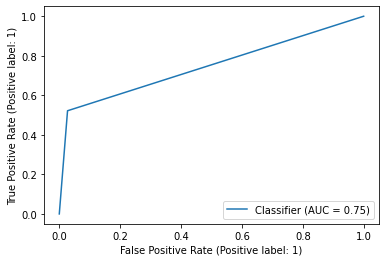

In [11]:
y_pred_treshold2 = np.where(y_pred2 > 0.9, 1, 0)
y_pred_treshold2 = y_pred_treshold2.reshape(-1, )

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_treshold2))
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred_treshold2)